In [122]:
from sklearn.datasets import make_blobs
from pathlib import Path
from sqlalchemy import create_engine
from pathlib import Path
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from pprint import pprint
import json
from citipy import citipy
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from datetime import datetime
warnings.filterwarnings("ignore")

In [123]:
# load csv file
file_path = pd.read_csv('/Users/pedrosiqueira/Desktop/ProsperLoanAnalysis/Project4_pedro/Update_Listings_cleaned_v1.csv')
# create a dataframe from the loaded csv file
cleaned_data_df = pd.DataFrame(file_path)
# print out the first 5 rows of the listing_df DataFrame
cleaned_data_df.head()

,unique_identifier,listing_amount,amount_funded,lender_yield,borrower_apr,listing_term,listing_monthly_payment,income_range,income_range_description,stated_monthly_income,...,lender_indicator,group_indicator,Fico_rating,TUFicoRange,dti_wprosper_loan,CoBorrowerApplication,CombinedDtiwProsperLoan,CombinedStatedMonthlyIncome,rating_num,prosper_rating
0,0,17300,17300,0.1349,0.1683,60,406.95,6,"$100,000+",11250.0000,...,0,False,6,760-779,0.2377,True,0.2377,16250.0000,1,B
1,1,25000,25000,0.0999,0.1325,60,543.44,6,"$100,000+",15416.6667,...,0,False,6,760-779,0.2900,True,0.2900,22333.3333,0,A
2,2,3500,3500,0.1179,0.1641,36,117.58,4,"$50,000-74,999",4166.6667,...,0,False,3,700-719,0.0309,True,0.0309,7500.0000,1,B
3,3,5000,5000,0.0964,0.1422,36,162.84,4,"$50,000-74,999",5000.0000,...,0,False,1,660-679,0.1818,True,0.1818,8333.3333,0,A
4,4,21795,21795,0.0530,0.0795,36,666.01,6,"$100,000+",20000.0000,...,0,False,9,820-850,0.1816,True,0.1816,23833.3333,0,AA


In [124]:
integer_df = cleaned_data_df.astype(int,errors='ignore')
integer_df

,unique_identifier,listing_amount,amount_funded,lender_yield,borrower_apr,listing_term,listing_monthly_payment,income_range,income_range_description,stated_monthly_income,...,lender_indicator,group_indicator,Fico_rating,TUFicoRange,dti_wprosper_loan,CoBorrowerApplication,CombinedDtiwProsperLoan,CombinedStatedMonthlyIncome,rating_num,prosper_rating
0,0,17300,17300,0,0,60,406,6,"$100,000+",11250,...,0,0,6,760-779,0,1,0,16250,1,B
1,1,25000,25000,0,0,60,543,6,"$100,000+",15416,...,0,0,6,760-779,0,1,0,22333,0,A
2,2,3500,3500,0,0,36,117,4,"$50,000-74,999",4166,...,0,0,3,700-719,0,1,0,7500,1,B
3,3,5000,5000,0,0,36,162,4,"$50,000-74,999",5000,...,0,0,1,660-679,0,1,0,8333,0,A
4,4,21795,21795,0,0,36,666,6,"$100,000+",20000,...,0,0,9,820-850,0,1,0,23833,0,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,656,7500,7500,0,0,36,248,6,"$100,000+",10000,...,0,0,3,700-719,0,1,0,14333,0,A
657,657,35000,35000,0,0,60,792,4,"$50,000-74,999",4833,...,0,0,6,760-779,0,1,0,10750,1,B
658,658,15000,15000,0,0,60,334,6,"$100,000+",10825,...,0,0,2,680-699,0,1,0,14705,0,A
659,659,15000,15000,0,0,60,339,6,"$100,000+",26325,...,0,0,3,700-719,0,1,0,27575,1,B


In [125]:
# Split the data into X (features) and y (target)
# The y variable should focus on the target column
y = integer_df['rating_num']

# The X variable should include all features except the target
X = integer_df.drop([
    "listing_amount", "unique_identifier","lender_yield", "borrower_apr", "listing_monthly_payment",
    "income_range_description","employment_status_description", "occupation", 
    "borrower_state_num", "borrower_state", "borrower_city", "group_indicator", 
    "TUFicoRange", "CoBorrowerApplication", "rating_num", "prosper_rating"    
], axis=1)



In [126]:
X.head()

,amount_funded,listing_term,income_range,stated_monthly_income,employment_status,months_employed,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,prior_prosper_loans_balance_outstanding,prior_prosper_loans_cycles_billed,prior_prosper_loans_ontime_payments,prior_prosper_loans_late_cycles,prior_prosper_loan_earliest_pay_off,lender_indicator,Fico_rating,dti_wprosper_loan,CombinedDtiwProsperLoan,CombinedStatedMonthlyIncome
0,17300,60,6,11250,0,300,2,25000,8809,0,1,1,0,7,0,6,0,0,16250
1,25000,60,6,15416,0,32,2,17000,0,0,0,0,0,1,0,6,0,0,22333
2,3500,36,4,4166,0,11,3,15000,0,0,15,15,0,0,0,3,0,0,7500
3,5000,36,4,5000,0,6,1,3000,0,0,0,0,0,24,0,1,0,0,8333
4,21795,36,6,20000,0,57,1,19000,0,0,0,0,0,30,0,9,0,0,23833


In [127]:
y.value_counts()

rating_num
0    413
1    214
2     34
Name: count, dtype: int64

In [128]:
y_test.value_counts()

rating_num
0    104
1     54
2      8
Name: count, dtype: int64

In [129]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,stratify=y)

In [130]:
#normalization 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [131]:

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [132]:
# make prediction on the test set
y_prediction = model.predict(X_test)
print(y_prediction)


[-0.20939222  0.06965157  0.40635733  1.0264822   0.57547034  0.48615674
  0.4882699   0.09713152  0.51390838  0.53354578  0.18579439 -0.04098093
  0.52726197  0.23347094  0.33892513  0.98414616  0.28537252 -0.22921242
  0.91239039  0.82352864 -0.256608    0.50952864  0.51113724  0.66332867
  0.3439908   0.39687289  0.42756284 -0.14449906  0.57355757  0.43073056
 -0.04772383  0.44698264  0.67685339  0.41208667  0.94742619  0.38189236
  0.6455965   0.47789242 -0.07521913  0.4477721   0.65636347  1.144169
 -0.04284373  0.37117702  0.04750436  0.37756564 -0.37128678  0.31056029
  0.45554008  0.50704376 -0.02676914  0.23505185  0.50110957  0.55655074
  0.31940799  0.6032008   0.67328589  0.15783695 -0.17091106  0.63514973
 -0.20412859  1.03883898  0.69230236  0.96475232  0.63417734  0.59518586
  0.33862019  0.53482118  0.72315617  0.00894844  0.67420836  0.32846952
  0.39072373  0.3088433   0.61443938  0.87092713  0.133081    0.74579253
  0.55684817  1.0528153   0.27115963  0.03778207  0.4

## Linear Regression Model Assessment

In [133]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the model
y_prediction = model.predict(X)

# Compute metrics
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, y_prediction)
mse = mean_squared_error(y, y_prediction)
rmse = np.sqrt(mse)
std = np.std(y_prediction)

# Print relevant metrics
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.3206672530823981.
The r2 is 0.3206672530823981.
The mean squared error is 0.23606183642697842.
The root mean squared error is 0.48586195202647675.
The standard deviation is 0.33787744159199773.


To apply a linear regression model assessment you would not be appropriate because of the target value, linear regression will be better if you wanted to predict the value of a loan.

 ## Logistic Regression Model

In [134]:
from sklearn.linear_model import LogisticRegression
classifier =  LogisticRegression(multi_class='ovr', solver='liblinear')
classifier

LogisticRegression(multi_class='ovr', solver='liblinear')

In [135]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [136]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.701010101010101
Testing Data Score: 0.7289156626506024


In [137]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})
print(predictions)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0
 0 1 0 1 0 2 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1]


In [138]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.7289156626506024

In [139]:
# Generate a confusion matrix for the model
cf_test_matrix = confusion_matrix(y_test, predictions)
print(cf_test_matrix )

[[95  9  0]
 [27 26  1]
 [ 2  6  0]]


In [140]:
# Print the classification report for the model
testing_report = classification_report(y_test, predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       104
           1       0.63      0.48      0.55        54
           2       0.00      0.00      0.00         8

    accuracy                           0.73       166
   macro avg       0.47      0.46      0.46       166
weighted avg       0.69      0.73      0.70       166



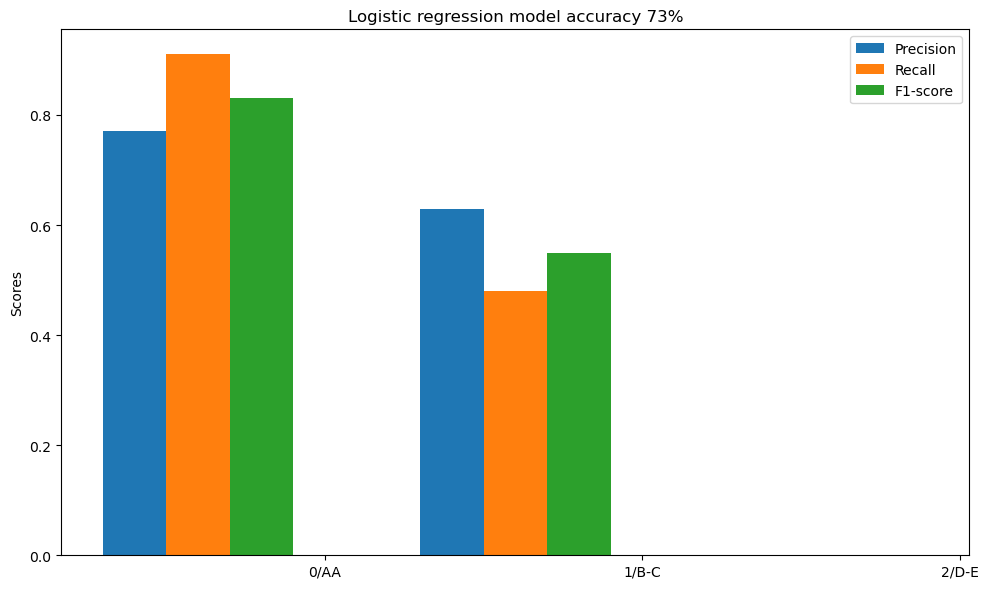

In [4]:
import matplotlib.pyplot as plt

# Data
data = {
    'Class': ['0/AA', '1/B-C', '2/D-E'],
    'Precision': [0.77, 0.63, 0.00],
    'Recall': [0.91, 0.48, 0.00],
    'F1-score': [0.83, 0.55, 0.00],
    }

# Plotting
plt.figure(figsize=(10, 6))

# Plotting precision, recall, and f1-score
plt.bar([0.9, 1.9, 2.9], data['Precision'], width=0.2, label='Precision')
plt.bar([1.1, 2.1, 3.1], data['Recall'], width=0.2, label='Recall')
plt.bar([1.3, 2.3, 3.3], data['F1-score'], width=0.2, label='F1-score')


plt.ylabel('Scores')
plt.title('Logistic regression model accuracy 73%')
plt.xticks([1.5, 2.5, 3.5], data['Class'])
plt.legend()

plt.tight_layout()
plt.show()
